## Рекомендация тарифов

## Оглавление   
 [Откройте и изучите файл](#paragraph3)  
 [Разбейте данные на выборки](#paragraph4)  
 [Исследуйте модели](#paragraph5)  
 [Проверьте модель на тестовой выборке](#paragraph6)  
 [(бонус) Проверьте модели на адекватность](#paragraph7)  
 [Вывод](#paragraph8)  
 [Чек-лист готовности проекта](#paragraph9)

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<a name="paragraph3"></a>
## Откройте и изучите файл

Импортируем библиотеки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from random import *


Прочитаем данные

In [6]:
data = pd.read_csv('datasets/users_behavior.csv')

Представление данных:

In [7]:
display(data.head(5))

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Напишем функцию для вывода простейшей гистограммы и проверим с её помощью значения в колонках.

In [9]:
def simple_hist(df, col, title, label_y, label_x, bins):
    """
    data: Датасет, подлежащий анализу
    col: Колонка датасета, подлежащая анализу 
    title: заголовок графика
    label_y: подпись по оси Y
    label_x: подпись по оси X
    bins: количество корзин 
    """
    df.hist(col, bins = bins)
    plt.title(title)
    plt.ylabel(label_y)
    plt.xlabel(label_x)

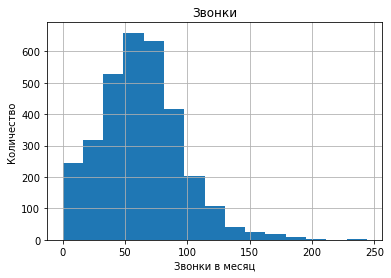

In [10]:
simple_hist(data, 
            'calls', 
            'Звонки', 
            'Количество', 'Звонки в месяц', 
            15)

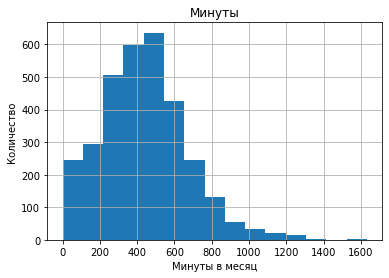

In [11]:
simple_hist(data, 
            'minutes', 
            'Минуты', 
            'Количество', 'Минуты в месяц', 
            15)

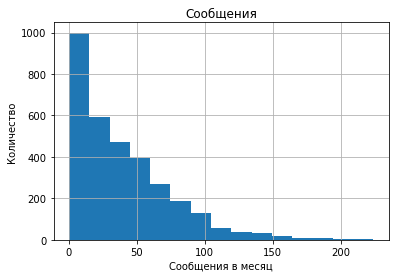

In [12]:
simple_hist(data, 
            'messages', 
            'Сообщения', 
            'Количество', 'Сообщения в месяц', 
            15)

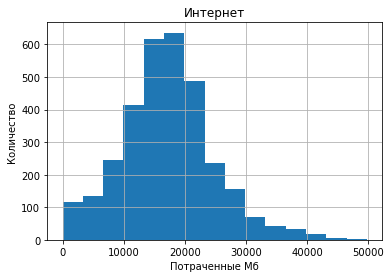

In [13]:
simple_hist(data, 
            'mb_used', 
            'Интернет', 
            'Количество', 'Потраченные Мб', 
            15)

In [14]:
data['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

С виду выборка кажется предобработанной (как и было сказано в условии) - можем продолжать.

<a name="paragraph4"></a>
## Разбейте данные на выборки

Заметим, что количество наблюдений тарифа ультра составляет примерно 30.65% от выборки.
Наш целевой признак определяется всего двумя значениями. Один из которых встречается всего в 30.65% случаев. 
Будем использовать параметр stratify для равномерного разделения выборки.

Получим тестовую выборку

In [15]:
data_prev, data_test = train_test_split(data, test_size=0.2, random_state=666, stratify = data['is_ultra'])

Получим валидационную выборку

In [16]:
data_train, data_valid = train_test_split(data_prev, test_size=0.25, random_state=666, stratify = data_prev['is_ultra'] )

Определим функции которые будут выделять отдельно признаки и отдельно целевой признак.

In [17]:
def get_target(data):
    return data['is_ultra']

In [18]:
def get_features(data):
    return data.drop(['is_ultra'], axis = 1)

Выделим отдельно признаки и целевой признак для обучаещего датасета.

In [19]:
target_train = get_target(data_train)
features_train = get_features(data_train)

Выделим отдельно признаки и целевой признак для валидационного датасета.

In [20]:
target_valid = get_target(data_valid)
features_valid = get_features(data_valid)

Выделим отдельно признаки и целевой признак для тестового датасета.

In [21]:
target_test = get_target(data_test)
features_test = get_features(data_test)

<a name="paragraph5"></a>
## Исследуйте модели

Построим модель дерево решений.  
Поэкспериментируем с гиперпараметром max_depth(максимальная глубина). Проверим модели со значениями от 1 до 15.

In [22]:
best_depth = None
best_result = 0
best_model_tree = None

for depth in range(1, 16):
    model_tree = DecisionTreeClassifier(random_state = 1, max_depth = depth)
    model_tree.fit(features_train, target_train) 
    predictions = model_tree.predict(features_valid) 
    result = accuracy_score(target_valid, predictions)
    if result > best_result:
        best_depth = depth
        best_result = result
        best_model_tree = model_tree
    
print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print("Наилучшее количество узлов:", best_depth)

Accuracy наилучшей модели на валидационной выборке: 0.7869362363919129
Наилучшее количество узлов: 4


Получили лучшую модель с максимальной глубиной равной 4.
Доля правильных ответов составила 78,7%

Построим модель случайный лес.  
Поэкспериментируем с гиперпараметрами:  
max_depth (макс. глубина) - Проверим модели со значениями от 1 до 15  
est (количество деревьев) - Проверим модели со значениями от 1 до 30  
criterion - выполним с критерием “gini” и с критерием “entropy" отдельно

Случайный лес. Критерий gini.

In [23]:
best_model_forest_gini = None
best_result_forest_gini = 0
best_est_forest_gini = 0
best_depth_forest_gini = 0

for est in range(1, 31):
    for depthh in range(1, 16):
        model = RandomForestClassifier(random_state=1, max_depth = depthh, n_estimators=est, criterion = 'gini')
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)
        
        if result > best_result_forest_gini:
            best_model_forest_gini = model
            best_est_forest_gini = est
            best_depth_forest_gini = depthh
            best_result_forest_gini = result
            
print("Accuracy наилучшей модели на валидационной выборке:", best_result_forest_gini)
print("Наилучшее количество деревьев:", best_est_forest_gini)
print("Наилучшее количество узлов:", best_depth_forest_gini)

Accuracy наилучшей модели на валидационной выборке: 0.8040435458786936
Наилучшее количество деревьев: 14
Наилучшее количество узлов: 8


Лучшая модель "Случайный лес. gini" получилась с количеством деревьев 14 и максимальной глубиной 8.
Точность составила 80,4%.

Случайный лес. Критерий entropy.

In [24]:
best_model_forest_entropy = None
best_result_forest_entropy = 0
best_est_forest_entropy = 0
best_depth_forest_entropy = 0

for est in range(1, 31):
    for depthh in range(1, 16):
        model = RandomForestClassifier(random_state=1, 
                                       max_depth = depthh, 
                                       n_estimators=est, 
                                       criterion = 'entropy')
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)
        if result > best_result_forest_entropy:
            best_model_forest_entropy = model
            best_est_forest_entropy = est
            best_depth_forest_entropy = depthh
            best_result_forest_entropy = result
            
print("Accuracy наилучшей модели на валидационной выборке:", best_result_forest_entropy)
print("Наилучшее количество деревьев:", best_est_forest_entropy)
print("Наилучшее количество узлов:", best_depth_forest_entropy)

Accuracy наилучшей модели на валидационной выборке: 0.7993779160186625
Наилучшее количество деревьев: 12
Наилучшее количество узлов: 7


Лучшая модель "Случайный лес. entropy" получилась с количеством деревьев 12 и максимальной глубиной 7. Точность составила 79,9%.

Построим модель логистическая регрессия.

In [25]:
model_logRegression = LogisticRegression(random_state = 1)
model_logRegression.fit(features_train, target_train)
result = model_logRegression.score(features_valid, target_valid)

print("Accuracy модели логистической регрессии на валидационной выборке:", result)

Accuracy модели логистической регрессии на валидационной выборке: 0.7402799377916018


Точность получилась равна 72,5%

<a name="paragraph6"></a>
## Проверьте модель на тестовой выборке

Проверим лучшие модели на тестовой выборке.

Модель дерево решений.

In [26]:
predictions = best_model_tree.predict(features_test) 
result = accuracy_score(target_test, predictions)

print("Accuracy наилучшей модели на тестовой выборке:", result)

Accuracy наилучшей модели на тестовой выборке: 0.7978227060653188


Модель случайный лес. gini.

In [27]:
result = best_model_forest_gini.score(features_test, target_test)

print("Accuracy наилучшей модели на тестовой выборке:", result)

Accuracy наилучшей модели на тестовой выборке: 0.8055987558320373


Модель случайный лес. entropy.

In [28]:
result = best_model_forest_entropy.score(features_test, target_test)

print("Accuracy наилучшей модели на тестовой выборке:", result)

Accuracy наилучшей модели на тестовой выборке: 0.80248833592535


Модель логистическая регрессия.

In [29]:
result = model_logRegression.score(features_test, target_test)

print("Accuracy модели логистической регрессии на тестовой выборке:", result)

Accuracy модели логистической регрессии на тестовой выборке: 0.7465007776049767


Accuracy наилучшей модели дерево решений. на тестовой выборке: 79.8%  
Accuracy наилучшей модели случайный лес (gini) на тестовой выборке: 80.6%  
Accuracy наилучшей модели случайный лес (entropy) на тестовой выборке: 80.2%  
Accuracy модели логистическая регрессия на тестовой выборке: 72,8%  


Все модели оказались устойчивыми. Точность предсказаний осталась на уровне валидационной выборки. 

Лучшая модель - случайный лес, однако её построение может занять некоторое время. Модели дерево решений и логистическая регрессия строятся мгновенно.

<a name="paragraph7"></a>
##  (бонус) Проверьте модели на адекватность

Попытаемся проанализировать исходные данные. Выявить закономерности и на их основании, "на глаз", предсказать тот или иной результат.
Анализировать будем датасет data_train.

Разделим данные по тарифам.

In [30]:
data_ultra = data_train.query('is_ultra == 1')
data_smart = data_train.query('is_ultra == 0')

In [31]:
data_ultra

,calls,minutes,messages,mb_used,is_ultra
1993,33.0,244.64,0.0,41587.07,1
164,72.0,507.52,38.0,3179.50,1
2115,85.0,514.90,0.0,9296.37,1
850,97.0,705.60,47.0,14407.85,1
2169,134.0,947.28,67.0,20160.96,1
...,...,...,...,...,...
1533,0.0,0.00,188.0,33189.50,1
3208,164.0,1016.98,71.0,17787.52,1
1281,148.0,1115.64,41.0,25465.40,1
1450,19.0,129.01,151.0,28584.39,1


Напишем функцию для сравнения обоих тарифов по параметрам на одном графике.

In [32]:
def SidebySideHist(data1, data2, FieldSmart = None, FieldUltra = None, LabelHorz = 'Количество наблюдений', LabelVert = None, TitleHist = 'Сравнительная гистограмма', bins = 20, names = ['Smart', 'Ultra']):
    """
    FieldSmart: Колонка датасета data1, которая участвует в сравнении
    FieldUltra: Колонка датасета data2, которая участвует в сравнении
    LabelVert: подпись по оси Y
    LabelHorz: подпись по оси X
    TitleHist: заголовок графика
    bins: количество корзин 
    """
    value_smart = data1[FieldSmart]
    value_ultra = data2[FieldUltra]

    colors = ['#E0DF00', '#56B4E9']

    
    plt.figure(figsize=(20,10))
    plt.hist([value_smart, value_ultra], bins = bins, density=True,
             color = colors, label=names)
    # Plot formatting
    plt.legend()
    plt.xlabel(LabelHorz)
    plt.ylabel(LabelVert)
    plt.title(TitleHist)

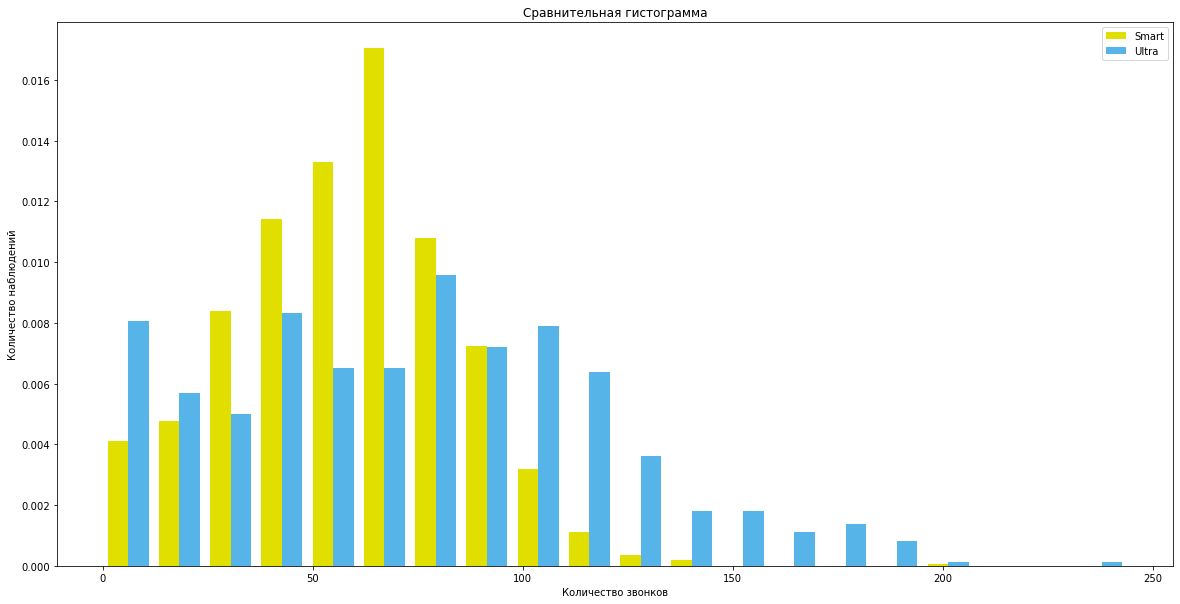

In [33]:
SidebySideHist(data_smart, data_ultra, 'calls', 'calls', 'Количество звонков', 'Количество наблюдений', 'Сравнительная гистограмма', 20, ['Smart', 'Ultra']);

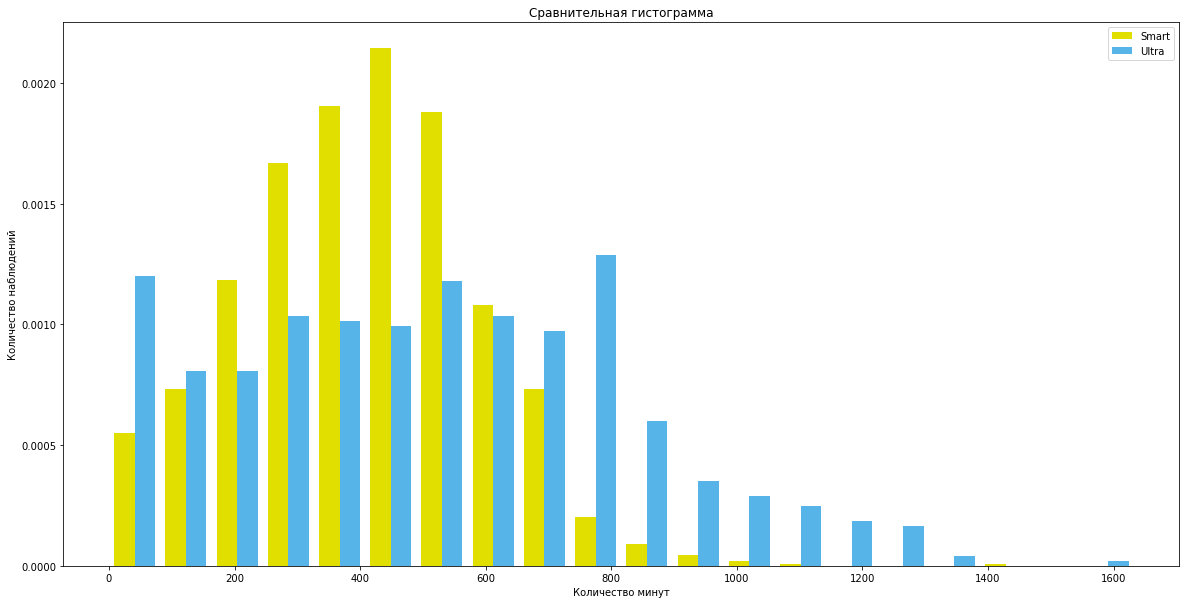

In [34]:
SidebySideHist(data_smart, data_ultra, 'minutes', 'minutes', 'Количество минут', 'Количество наблюдений', 'Сравнительная гистограмма', 20, ['Smart', 'Ultra']);

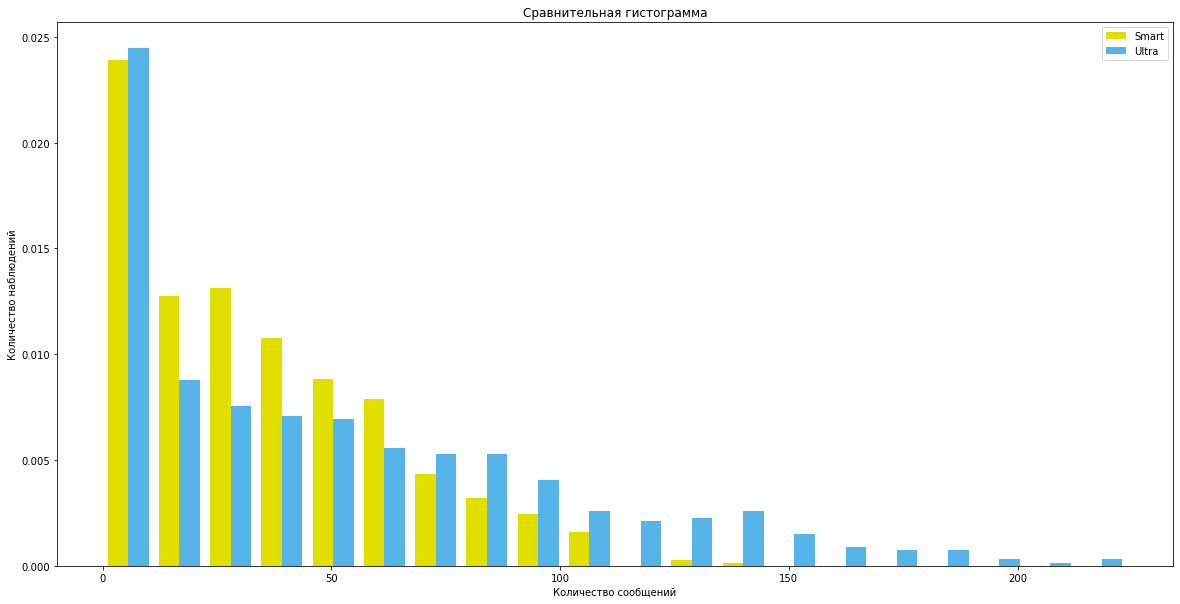

In [35]:
SidebySideHist(data_smart, data_ultra, 'messages', 'messages', 'Количество сообщений', 'Количество наблюдений', 'Сравнительная гистограмма', 20, ['Smart', 'Ultra']);

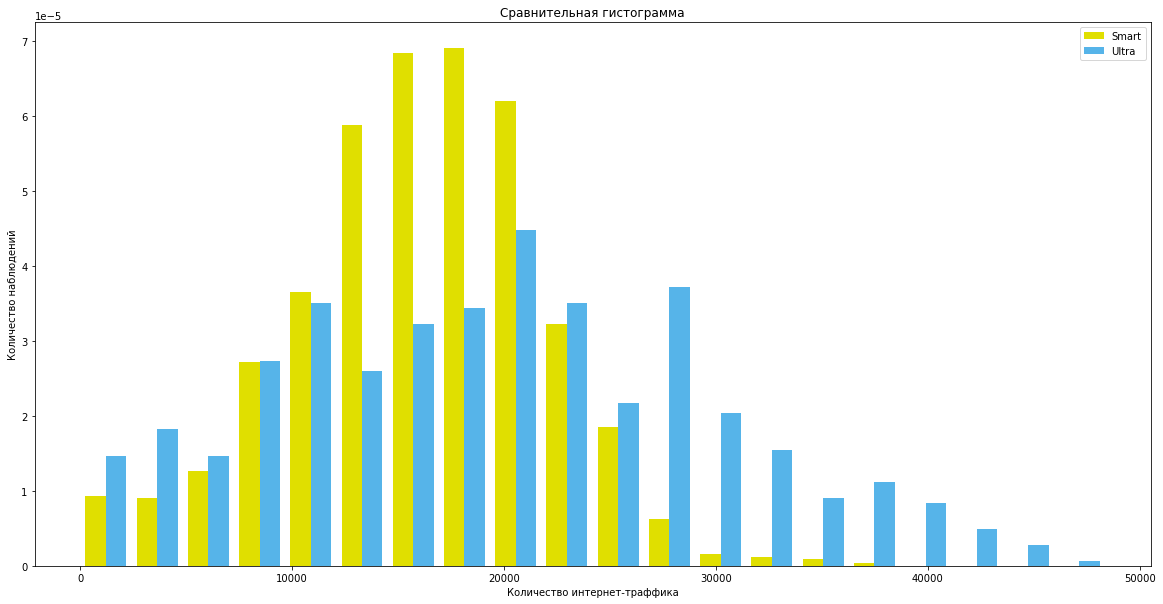

In [36]:
SidebySideHist(data_smart, data_ultra, 'mb_used', 'mb_used', 'Количество интернет-траффика', 'Количество наблюдений', 'Сравнительная гистограмма', 20, ['Smart', 'Ultra']);

Посмотрим на статистические характеристики тарифов.

Тариф Смарт:

In [37]:
data_smart.describe()

,calls,minutes,messages,mb_used,is_ultra
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.0
mean,58.376215,405.694480,33.913239,16055.341339,0.0
std,26.145232,186.035095,28.337544,5863.064274,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,40.000000,276.810000,10.000000,12617.750000,0.0
50%,60.000000,411.460000,28.000000,16367.640000,0.0
75%,76.000000,528.430000,52.000000,19918.660000,0.0
max,198.000000,1390.220000,143.000000,38552.620000,0.0


Тариф Ультра:

In [38]:
data_ultra.describe()

,calls,minutes,messages,mb_used,is_ultra
count,591.000000,591.000000,591.000000,591.000000,591.0
mean,73.725888,512.151015,51.164129,19593.287631,1.0
std,45.311120,316.628874,48.783213,10153.386784,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,39.000000,265.410000,7.000000,11673.120000,1.0
50%,74.000000,510.850000,40.000000,19459.080000,1.0
75%,106.000000,740.815000,81.000000,27036.370000,1.0
max,244.000000,1632.060000,224.000000,48351.610000,1.0


Заметим, что наиболее ярко датасета отличаются по количеству использованных минут и потраченных Мб. Будем исследовать данные параметры.

Количество использованных Мб:
    Тариф смарт:
        Медиана - 16367
        Среднее - 16055
    Тариф ультра:
        Медиана - 19459
        Среднее - 19593

Количество использованных минут:
    Тариф смарт:
        Медиана - 411
        Среднее - 405
    Тариф ультра:
        Медиана - 510
        Среднее - 512
        
Можем предположить, ориентируясь на эти значения и на графики, что 
Пользователи тарифа смарт тратят:
    Меньше 400 мин И меньше 16000 Мб
Пользователи ультра тратят:
    Больше 500 мин И больше 19000 Мб
    
На отрезке 400-500 мин или 16000-19000 Мб лежат "пограничные" пользователи. Исследуем их отдельно.
Выделим в отдельные датасеты и посмотрим на графике.

In [39]:
data_smart_border = data_smart.query('minutes >= 400 and minutes <= 500 or mb_used >= 16000 and mb_used <= 19000')
data_ultra_border = data_ultra.query('minutes >= 400 and minutes <= 500 or mb_used >= 16000 and mb_used <= 19000')

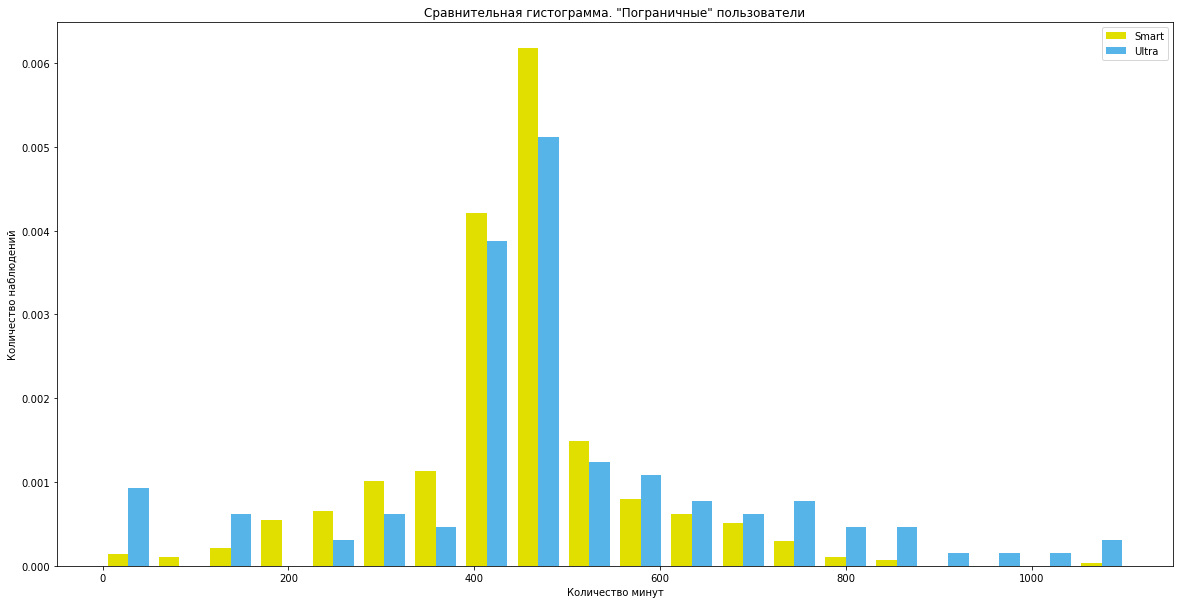

In [40]:
SidebySideHist(data_smart_border, data_ultra_border, 'minutes', 'minutes', 'Количество минут', 'Количество наблюдений', 'Сравнительная гистограмма. "Пограничные" пользователи', 20, ['Smart', 'Ultra']);

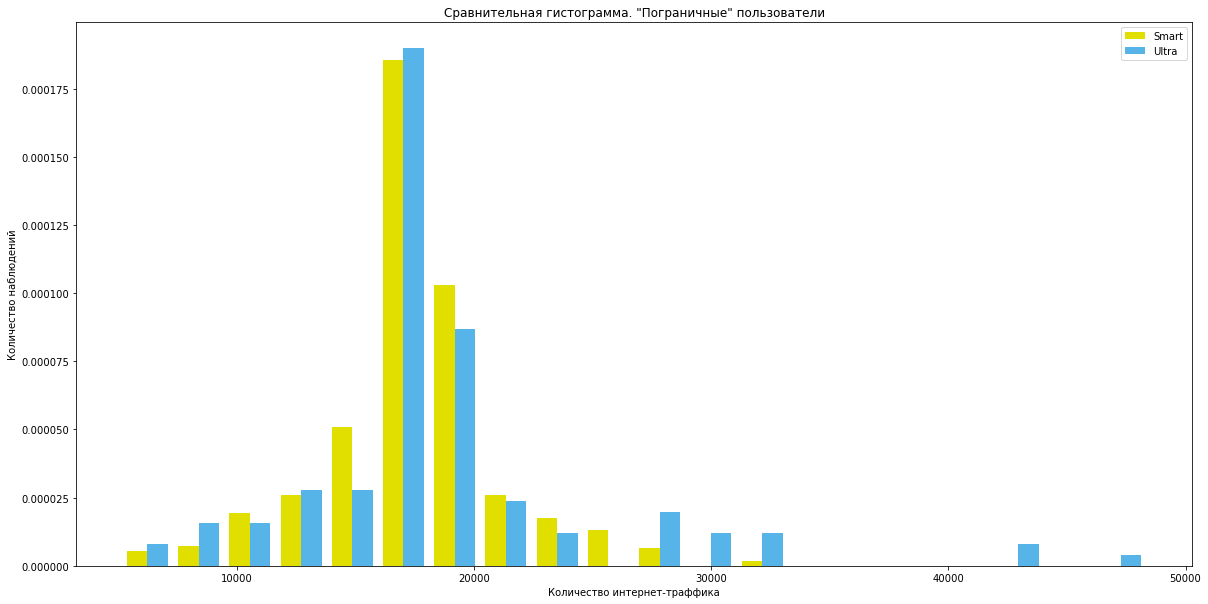

In [41]:
SidebySideHist(data_smart_border, data_ultra_border, 'mb_used', 'mb_used', 'Количество интернет-траффика', 'Количество наблюдений', 'Сравнительная гистограмма. "Пограничные" пользователи', 20, ['Smart', 'Ultra']);

Для "пограничных" пользователей определим следующие правила определения:
    
    Тариф смарт:
        1 Количество минут < 500
    Тариф ультра:
        1 Количество минут > 600 
        2 Количество интернет-трафика > 20000
        
Для остальных пользователей - определить очень сложно (они очень похожи), поэтому будем отбирать функцией рандома.

Напишем специальную функцию определения. После чего с её помощью предскажем данные на тестовой и валидационной выборках 

In [42]:
def predict_tariff(row):
    try:
        if(row['minutes'] < 400 and row['mb_used'] < 16000):
            return 0;
        if(row['minutes'] > 500 and row['mb_used'] > 19000):
            return 1;
        if (row['minutes'] >= 400 and row['minutes'] <= 500 or row['mb_used'] >= 16000 and row['mb_used'] <= 19000):
            if(row['minutes'] < 500):
                return 0;
            if(row['minutes'] > 600):
                return 1;
            if(row['mb_used'] > 20000):
                return 1;
        return randint(0, 1);
    except:
        return 'Ошибка при вычислении'

Напишем функцию подсчета точности предсказания.

In [43]:
def accuracy(data):
    try:
        count = 0
        for index, row in data.iterrows():
            if(row['predictions'] == row['is_ultra']):
                count = count + 1
        return count/len(data)
    except:
        return 'Ошибка при вычислении'

In [44]:
data_valid['predictions'] = data_valid.apply(predict_tariff, axis = 1);

<ipython-input-44-be1ede6b19e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_valid['predictions'] = data_valid.apply(predict_tariff, axis = 1);


In [45]:
print("Точность функции на валидационной выборке:", accuracy(data_valid))

Точность функции на валидационной выборке: 0.6236391912908242


Протестируем на тестовой выборке

In [46]:
data_test['predictions'] = data_test.apply(predict_tariff, axis = 1);

<ipython-input-46-1c84b9f3289f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['predictions'] = data_test.apply(predict_tariff, axis = 1);


In [48]:
print("Точность функции на тестовой выборке:", accuracy(data_test))

Точность функции на тестовой выборке: 0.6485225505443235


Из-за добавленного эффекта случайности при определении тарифа по признакам, точность нашей функции предсказания - плавающая. Я выполнил её несколько раз и получались значения в районе 60-65% точности. Что, однако, не так уж и плохо.
При этом, можно утверждать, что модели дерево решений, случайный лес и логистическая регрессия прошли тест на адекватность и они, действительно, будут полезны при решении практических задач - т.к. определяют точнее, чем мы определили методом "на глаз".

In [49]:
target_test.value_counts() / features_test.shape[0]

0    0.693624
1    0.306376
Name: is_ultra, dtype: float64

In [50]:

from sklearn.metrics import roc_auc_score

# для подсчета  auc вторым аргументов я передаю предсказанную вероятность принадлежности к классу,
# а не сам предсказанный класс

print('Лес auc тест', roc_auc_score(target_test, best_model_forest_entropy.predict_proba(features_test)[:, 1]))
print('Регресиия auc тест', roc_auc_score(target_test, model_logRegression.predict_proba(features_test)[:, 1]))

Лес auc тест 0.8139241082606815
Регресиия auc тест 0.6769707040586374


<a name="paragraph8"></a>
## Вывод

На первом этапе мы открыли и проанализировали исходные данные. Убедились, что предобработка уже проведена.  

На втором этапе было произведено разбиение исходных данных на обучающую, валидационную и тестовую выборки.  
Было отмечено, что наш целевой признак определяется всего двумя значениями. Одно из которых (тариф ультра) встречается всего в 30.65% от выборки. Было принято решение использовать параметр stratify для равномерного разделения выборки. После разбиения исходных данных мы разделили отдельно признаки и целевой признак.

На третьем этапе провели исследование моделей.  
Модель дерево решений:

    Происследованы модели со значениями гиперпараметра max_depth(максимальная глубина) от 1 до 15.  
    Получили лучшую модель с максимальной глубиной равной 4.
    Точность составила 78,7%
    
Модель случайный лес.

    Происследованы модели со значениями гиперпараметров:
    max_depth (макс. глубина) - от 1 до 15
    est (количество деревьев) - от 1 до 30
    criterion - выполним с критерием “gini” и с критерием “entropy" отдельно
    
    Лучшая модель получилась с количеством деревьев 14, максимальной глубиной 8, критерий gini. 
    Точность составила 80,4%.
    
    Лучшая модель "Случайный лес. entropy" получилась с количеством деревьев 12 и максимальной глубиной 7.  
    Точность составила 79,9%.

    
Модель логистическая регрессия.

    Точность получилась равна 72,5%
    
Исследования на тестовой выборке показали следующие результаты.

Accuracy наилучшей модели дерево решений. на тестовой выборке: 79.8%  
Accuracy наилучшей модели случайный лес (gini) на тестовой выборке: 80.6%  
Accuracy наилучшей модели случайный лес (entropy) на тестовой выборке: 80.2%  
Accuracy модели логистическая регрессия на тестовой выборке: 72,8%  


Все модели оказались устойчивыми. Точность предсказаний осталась на уровне валидационной выборки. 

Лучшая модель - случайный лес, однако её построение может занять некоторое время. Модели дерево решений и логистическая регрессия строятся мгновенно.

БОНУС! Проверка моделей на адекватность.  
Проанализировали исходные данные на примере датасета data_train. Для начала разделили данные по тарифам, после чего проанализировали каждый датасет.  
Наиболее ярко датасета отличаются по количеству использованных минут и потраченных Мб. Будем исследовать данные параметры.
Количество использованных Мб:  
Тариф смарт:  
Медиана - 16367 Среднее - 16055  
Тариф ультра:  
Медиана - 19459 Среднее - 19593  
Количество использованных минут:  
Тариф смарт: Медиана - 411 Среднее - 405  
Тариф ультра: Медиана - 510 Среднее - 512

Можем предположить, ориентируясь на эти значения и на графики, что пользователи тарифа смарт тратят:  
Меньше 400 мин И меньше 16000 Мб  
Пользователи ультра тратят: Больше 500 мин И больше 19000 Мб  

На отрезке 400-500 мин или 16000-19000 Мб лежат "пограничные" пользователи. Происследовали их отдельно.

Для "пограничных" пользователей определили следующие правила определения:

Тариф смарт:
    1 Количество минут < 500
Тариф ультра:
    1 Количество минут > 600 
    2 Количество интернет-трафика > 20000

Для остальных пользователей - определить очень сложно (они очень похожи), поэтому будем отбирать функцией рандома.

Из-за добавленного эффекта случайности при определении тарифа по признакам, точность нашей функции предсказания - плавающая. Я выполнил её несколько раз и получались значения в районе 60-65% точности. Что, однако, не так уж и плохо.
При этом, можно утверждать, что модели дерево решений, случайный лес и логистическая регрессия прошли тест на адекватность и они, действительно, будут полезны при решении практических задач - т.к. определяют точнее, чем мы определили методом "на глаз".

<a name="paragraph9"></a>
## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [ ] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
